In [97]:
import pandas as pd
import numpy as np
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE, ADASYN

import warnings
warnings.filterwarnings('ignore')

In [98]:
df = pd.read_excel('heart.xlsx')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,negative
1,37,1,3,130,250,0,0,187,0,3.5,3,0,3,negative
2,41,0,2,130,204,0,2,172,0,1.4,1,0,3,negative
3,56,1,2,120,236,0,0,178,0,0.8,1,0,3,negative
4,57,0,4,120,354,0,0,163,1,0.6,1,0,3,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,64,1,4,145,212,0,2,132,0,2.0,2,2,6,positive
173,38,1,1,120,231,0,0,182,1,3.8,2,0,7,positive
174,61,1,4,138,166,0,2,125,1,3.6,2,1,3,positive
175,58,1,4,114,318,0,1,140,0,4.4,3,3,6,positive


In [99]:
df["dummy_num"]=df["num"].replace({"negative":0, "positive":1})
df=df.replace({"<null>":np.nan})

In [100]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,dummy_num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,negative,0
1,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,negative,0
2,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,negative,0
3,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,negative,0
4,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,negative,0


In [101]:
df.drop(columns=['num'], inplace=True)

In [102]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           3
thal         1
dummy_num    0
dtype: int64

In [103]:
df.dropna(inplace=True)

In [104]:
Y=df["dummy_num"]
X=df.drop("dummy_num", axis=1)

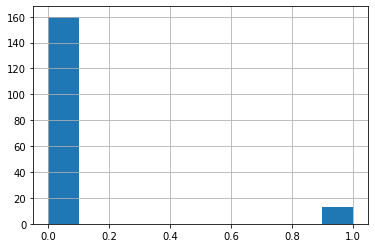

In [105]:
df.dummy_num.hist()

In [106]:
def create_model(X, Y):
    X_train, X_test, y_train, y_test =  train_test_split(X, Y, test_size=0.20, random_state=111, stratify = Y)
    logreg_model = LogisticRegression()
    logreg_model.fit(X_train, y_train)

    prediction_train = logreg_model.predict(X_train)
    prediction_test = logreg_model.predict(X_test)
    error_matris_train = confusion_matrix(y_train, prediction_train)
    error_matris_test = confusion_matrix(y_test, prediction_test)
    print("Model Accuracy : ",  logreg_model.score(X_test, y_test))
    print("train dataset")
    print(classification_report(y_train,prediction_train) )
    print("Test dataset")
    print(classification_report(y_test,prediction_test) )
    return  None

In [107]:
create_model(X,Y)

Model Accuracy :  0.9428571428571428
train dataset
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       128
           1       1.00      0.60      0.75        10

    accuracy                           0.97       138
   macro avg       0.98      0.80      0.87       138
weighted avg       0.97      0.97      0.97       138

Test dataset
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        32
           1       1.00      0.33      0.50         3

    accuracy                           0.94        35
   macro avg       0.97      0.67      0.73        35
weighted avg       0.95      0.94      0.93        35



In [108]:
sick = df[df.dummy_num == 1]
healthy = df[df.dummy_num == 0]

print('Healthy Count:', len(healthy),'\n'
      'Sick Count:', len(sick))

Healthy Count: 160 
Sick Count: 13


In [109]:
sick_inc = resample(sick,
                       replace = True,
                       n_samples = len(healthy),
                       random_state = 11)
df_inc = pd.concat([healthy, sick_inc])
df_inc.dummy_num.value_counts()

1    160
0    160
Name: dummy_num, dtype: int64

In [110]:
create_model(df_inc.drop('dummy_num', axis = 1), df_inc.dummy_num)

Model Accuracy :  0.953125
train dataset
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       128
           1       0.95      1.00      0.97       128

    accuracy                           0.97       256
   macro avg       0.97      0.97      0.97       256
weighted avg       0.97      0.97      0.97       256

Test dataset
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        32
           1       0.91      1.00      0.96        32

    accuracy                           0.95        64
   macro avg       0.96      0.95      0.95        64
weighted avg       0.96      0.95      0.95        64



In [111]:
Y=df["dummy_num"]
X=df.drop("dummy_num", axis=1)
sm = SMOTE(random_state = 27)
X_smote, Y_smote = sm.fit_sample(X,Y)

In [112]:
create_model(X_smote, Y_smote)

Model Accuracy :  0.96875
train dataset
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       128
           1       0.95      0.99      0.97       128

    accuracy                           0.97       256
   macro avg       0.97      0.97      0.97       256
weighted avg       0.97      0.97      0.97       256

Test dataset
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        32
           1       0.94      1.00      0.97        32

    accuracy                           0.97        64
   macro avg       0.97      0.97      0.97        64
weighted avg       0.97      0.97      0.97        64



In [113]:
ad = ADASYN()
X_adasyn, y_adasyn = ad.fit_sample(X, Y)

In [114]:
create_model(X_adasyn, y_adasyn)

Model Accuracy :  0.953125
train dataset
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       128
           1       0.95      0.98      0.97       127

    accuracy                           0.96       255
   macro avg       0.97      0.96      0.96       255
weighted avg       0.97      0.96      0.96       255

Test dataset
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        32
           1       0.94      0.97      0.95        32

    accuracy                           0.95        64
   macro avg       0.95      0.95      0.95        64
weighted avg       0.95      0.95      0.95        64



In [96]:
## Results

Best model accuracy; SMOTE - 0.96875 

Best precision; Imbalanced Dataset - 1.0 (SMOTE 0.94)

Best recall; SMOTE & Increased Resampling - 1.0

Best f1 score; SMOTE - 0.97
